In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
msg = "1011101011100101001111010100110101001101001000100011110010110111"
#msg = '10110100101101110011000110011011'
#msg16 = '1010110101101000111010010100101110101101000000101010111011110011011110000011100100111110001101011000100101010010111000001110110101111011110010110110111101011010000000101100011100011010111111010011010110111010010010111110111011111010001000010110011110010111'
# s = np.random.randint(0,2, 64)
# for i in s:
#     msg+=str(i)

mapper = {"00":  1+1j,
          "10": -1+1j,
          "01": -1-1j,
          "11":  1-1j}



symbls = [mapper[msg[i:i+2]] for i in range(0,len(msg), 2)]

symbls_upsampled = []
L = 10
for i in symbls:
    symbls_upsampled = np.concatenate([symbls_upsampled, [i]+([0]*(L-1))])


# Rectangular 

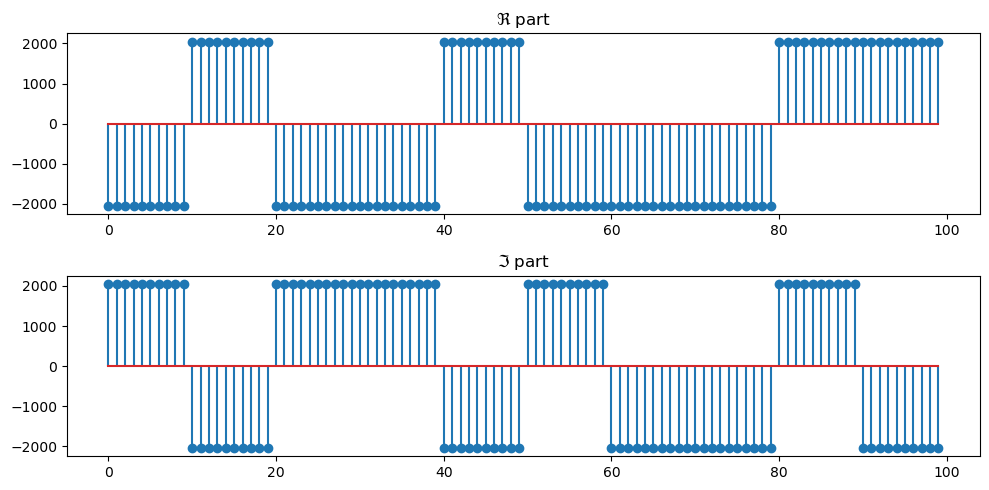

In [4]:
h_rec = np.ones(L)
rec_pulses = np.convolve(symbls_upsampled, h_rec)*(2**11)
rec_pulses = rec_pulses[:-(L-1)]
np.savetxt("PlutoPoly/rec.txt", rec_pulses.view(float).reshape(-1, 2))

fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].stem(np.real(rec_pulses)[:100])
ax[0].set_title(r"$\Re$ part")
ax[1].stem(np.imag(rec_pulses)[:100])
ax[1].set_title(r"$\Im$ part")
fig.tight_layout()


# Raised Cosine

51


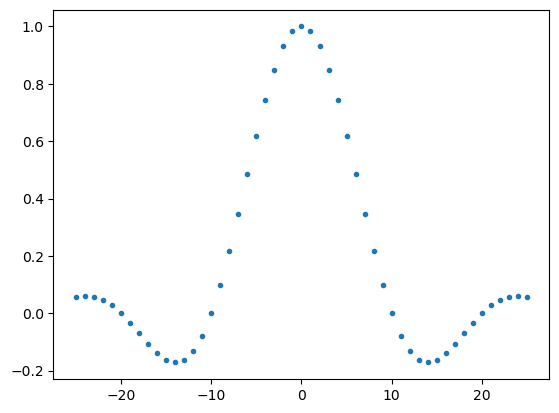

In [8]:
fs = 1e6 #Hz
Ts = L 
beta = 0.35
num_taps = 51
t = np.arange(num_taps) - (num_taps-1)//2
print(len(t))
h_rc = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
plt.plot(t, h_rc, ".");



[-1.16805007e+02 -1.24218871e+02 -1.17834464e+02 -9.52520173e+01
 -5.56123794e+01  4.88808088e-14  6.83197727e+01  1.43878775e+02
  2.19228989e+02  2.85414213e+02  4.49470882e+02  4.75489320e+02
  4.50366342e+02  3.64987350e+02  2.14623379e+02 -1.19947733e-13
 -2.72080743e+02 -5.88673786e+02 -9.31235673e+02 -1.27677358e+03
 -1.71633121e+03 -1.99726109e+03 -2.19030657e+03 -2.27210833e+03
 -2.22679511e+03]


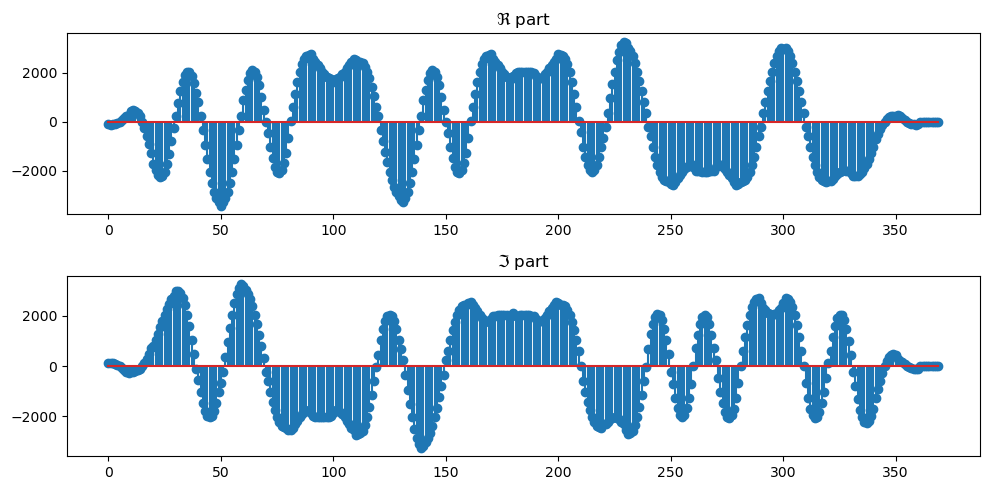

In [9]:
rc_pulses = np.convolve(symbls_upsampled, h_rc)*(2**11)
np.savetxt("rc.txt", rc_pulses.view(np.int16).reshape(-1, 2))


fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].stem(np.real(rc_pulses)[0:600])
ax[0].set_title(r"$\Re$ part")
ax[1].stem(np.imag(rc_pulses)[0:600])
ax[1].set_title(r"$\Im$ part")
fig.tight_layout()

print(np.real(rc_pulses)[0:25])

# Root Rised Cosine

101


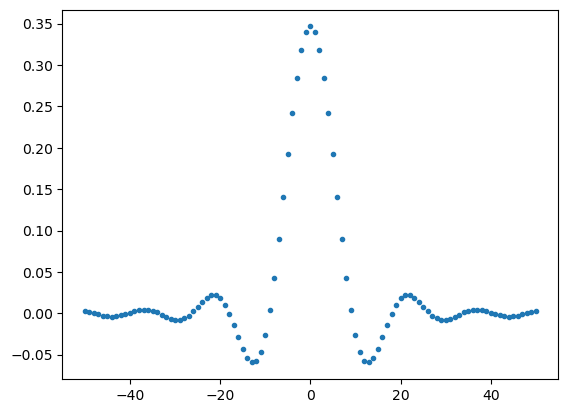

In [11]:
@np.vectorize
def rrc(t, beta, Ts):
    if t == 0: return (1/np.sqrt(Ts)) * (1-beta+4*(beta/np.pi))
    if t == Ts/(4*beta) or t == -Ts/(4*beta):
        return (beta/(np.sqrt(2*Ts)))*((1+2/np.pi)*np.sin(np.pi/(4*beta)) + (1-2/np.pi)*np.cos(np.pi/(4*beta)))
    else:
        return (1/np.sqrt(Ts)) * ((np.sin(np.pi * (t/Ts) * (1-beta)) + 4*beta*(t/Ts)*np.cos(np.pi * (t/Ts) * (1+beta)))/ \
                                 (np.pi*(t/Ts)*(1-(4*beta*(t/Ts))**2)))

Ts = L 
beta = 0.35
num_taps = 101
t = np.arange(num_taps) - (num_taps-1)//2
print(len(t))
h_rrc = rrc(t, beta, Ts)
plt.plot(t, h_rrc, '.');

320

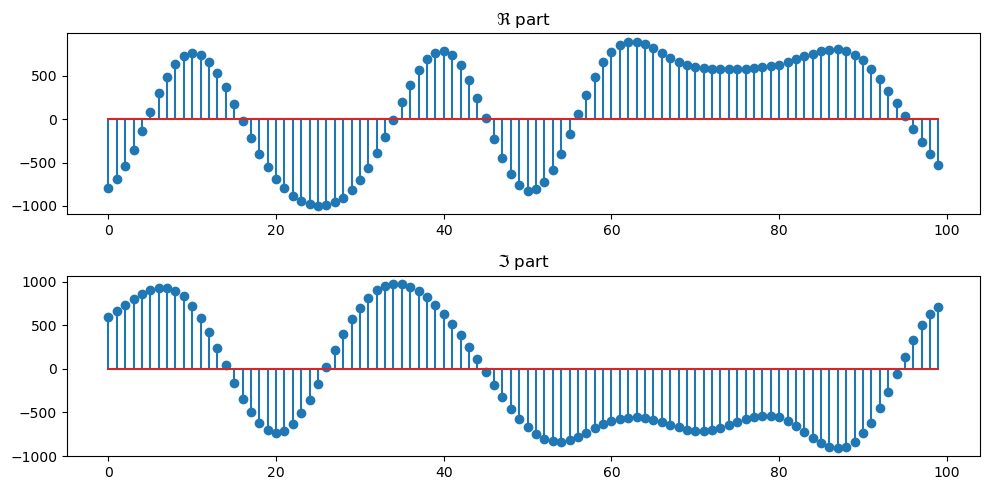

In [25]:
rrc_pulses = np.convolve(symbls_upsampled, h_rrc)*(2**11)
rrc_pulses = rrc_pulses[50:-50]
rrc_pulses = rrc_pulses.real.astype(np.int16) + rrc_pulses.imag.astype(np.int16)*1j
np.savetxt("rrc.txt", rrc_pulses.view(float).reshape(-1, 2))



fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].stem(np.real(rrc_pulses)[:100:])
ax[0].set_title(r"$\Re$ part")
ax[1].stem(np.imag(rrc_pulses)[:100:])
ax[1].set_title(r"$\Im$ part")
fig.tight_layout()

len(rrc_pulses)

# Rectangular QAM16

In [102]:
msg = ''
s = np.random.randint(0,2, 256)
for i in s:
    msg+=str(i)
symbls =  [(2*int(msg[i:i+4][0:2], 2) -3) + 1j*(2*int(msg[i:i+4][2::], 2)-3) for i in range(0, len(msg), 4)]
symbls_upsampled = []
L = 10
for i in symbls:
    symbls_upsampled = np.concatenate([symbls_upsampled, [i]+([0]*(L-1))])


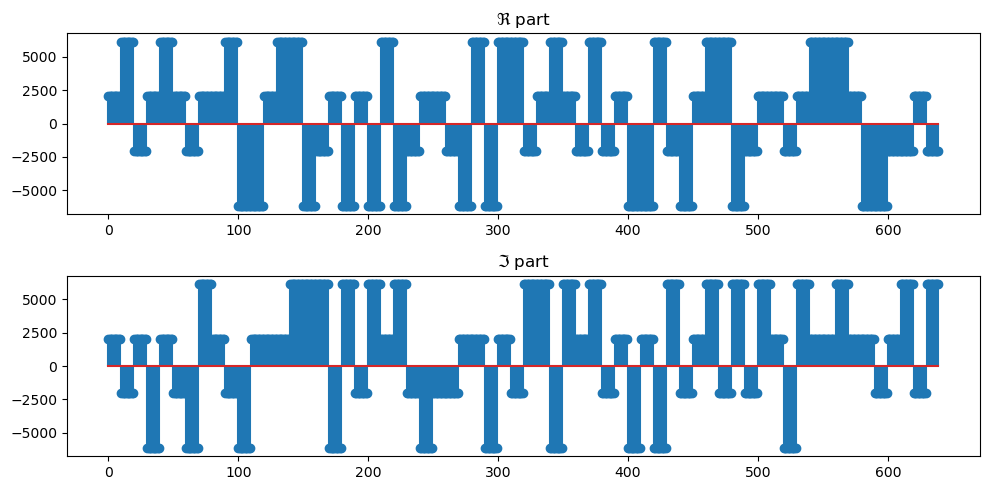

In [104]:
h_rec = np.ones(L)
rec_pulses = np.convolve(symbls_upsampled, h_rec)*(2**11)
rec_pulses = rec_pulses[:-9]
np.savetxt("rec_16.txt", rec_pulses.view(float).reshape(-1, 2))

fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].stem(np.real(rec_pulses))
ax[0].set_title(r"$\Re$ part")
ax[1].stem(np.imag(rec_pulses))
ax[1].set_title(r"$\Im$ part")
fig.tight_layout()

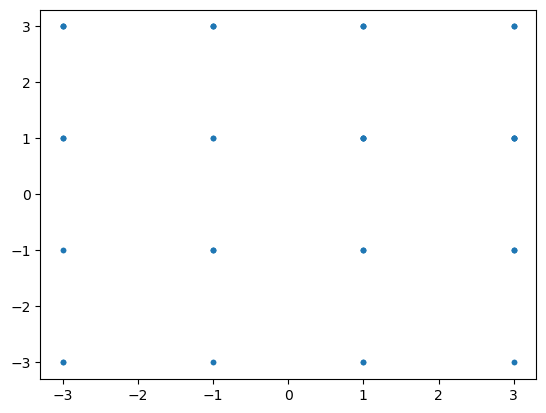

In [103]:
plt.plot(np.real(symbls), np.imag(symbls), ".")

In [105]:
len(rec_pulses)

640

In [19]:
msg16 = msg = '1010110101101000111010010100101110101101000000101010111011110011011110000011100100111110001101011000100101010010111000001110110101111011110010110110111101011010000000101100011100011010111111010011010110111010010010111110111011111010001000010110011110010111'